In [1]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

## Stock Price 데이터 상관관계 분석 
### (구글, 애플, 아마존, 페이스북, 넷플릭스, 마이크로소프트)

In [2]:
stocks = px.data.stocks()
stocks

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [9]:
corr_df = stocks.corr()
corr_df = corr_df.apply(lambda x: round(x ,3))
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.000,0.834,0.557,0.633,0.140,0.747
AAPL,0.834,1.000,0.561,0.493,0.050,0.787
AMZN,0.557,0.561,1.000,0.341,0.620,0.661
FB,0.633,0.493,0.341,1.000,0.266,0.472
NFLX,0.140,0.050,0.620,0.266,1.000,0.080
MSFT,0.747,0.787,0.661,0.472,0.080,1.000


In [10]:
corr_df['GOOG']

GOOG    1.000
AAPL    0.834
AMZN    0.557
FB      0.633
NFLX    0.140
MSFT    0.747
Name: GOOG, dtype: float64

In [11]:
s = corr_df.unstack() # 각 column별로 한것과 마찬가지의 효과
s

GOOG  GOOG    1.000
      AAPL    0.834
      AMZN    0.557
      FB      0.633
      NFLX    0.140
      MSFT    0.747
AAPL  GOOG    0.834
      AAPL    1.000
      AMZN    0.561
      FB      0.493
      NFLX    0.050
      MSFT    0.787
AMZN  GOOG    0.557
      AAPL    0.561
      AMZN    1.000
      FB      0.341
      NFLX    0.620
      MSFT    0.661
FB    GOOG    0.633
      AAPL    0.493
      AMZN    0.341
      FB      1.000
      NFLX    0.266
      MSFT    0.472
NFLX  GOOG    0.140
      AAPL    0.050
      AMZN    0.620
      FB      0.266
      NFLX    1.000
      MSFT    0.080
MSFT  GOOG    0.747
      AAPL    0.787
      AMZN    0.661
      FB      0.472
      NFLX    0.080
      MSFT    1.000
dtype: float64

In [12]:
# Series이므로 DataFrame으로 변경. 
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['correlation'])
df.style.background_gradient(cmap='viridis')

# Heatmap data visualization

## Matplotlib

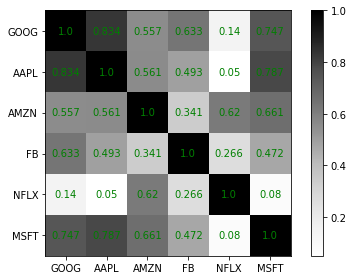

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show() 

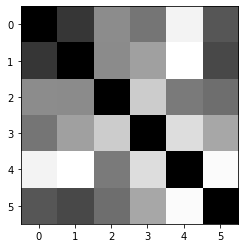

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Greys')

In [15]:
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.000,0.834,0.557,0.633,0.140,0.747
AAPL,0.834,1.000,0.561,0.493,0.050,0.787
AMZN,0.557,0.561,1.000,0.341,0.620,0.661
FB,0.633,0.493,0.341,1.000,0.266,0.472
NFLX,0.140,0.050,0.620,0.266,1.000,0.080
MSFT,0.747,0.787,0.661,0.472,0.080,1.000


## Seaborn

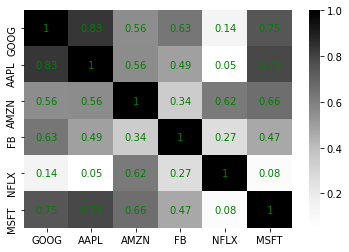

In [16]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

## nlargest, nsmallest

In [17]:
corr5 = corr_df.nlargest(5, 'GOOG')
corr5 = corr5[list(corr5.index)]
corr5

,GOOG,AAPL,MSFT,FB,AMZN
GOOG,1.000,0.834,0.747,0.633,0.557
AAPL,0.834,1.000,0.787,0.493,0.561
MSFT,0.747,0.787,1.000,0.472,0.661
FB,0.633,0.493,0.472,1.000,0.341
AMZN,0.557,0.561,0.661,0.341,1.000


In [18]:
corr3 = corr_df.nlargest(3, 'GOOG')
corr3 = corr3[list(corr3.index)]
corr3

,GOOG,AAPL,MSFT
GOOG,1.000,0.834,0.747
AAPL,0.834,1.000,0.787
MSFT,0.747,0.787,1.000
